In [ ]:
#DataFrames
import numpy as np
import pandas as pd

#Scikit learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

#Visuals
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from pandas import plotting

#Others
import random
random.seed(42)
import warnings
import os
warnings.filterwarnings("ignore")
from IPython.display import Image
import math

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# rows, columns
df.shape

(200, 5)

In [ ]:
# Check for Nulls
df.isnull().sum().sort_values(ascending=False)

Spending Score (1-100)    0
Annual Income (k$)        0
Age                       0
Genre                     0
CustomerID                0
dtype: int64

In [ ]:
# Unique values count
print(df.nunique())

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


'CustomerID'is primary key of the dataset and its unique counts matches the total record count. Hence, no duplicate records.

In [ ]:
# drop Customer id 
df = df.drop('CustomerID', axis=1)
df.head(2)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [ ]:
# rename columns
new_cols = ['Gender', 'Age', 'AnnualIncome','SpendingScore']

df.columns = new_cols

df.head(3)

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


For easy use, we 
have renamed all the column names to get ride of spaces and special characters.

# **EDA**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         200 non-null    object
 1   Age            200 non-null    int64 
 2   AnnualIncome   200 non-null    int64 
 3   SpendingScore  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


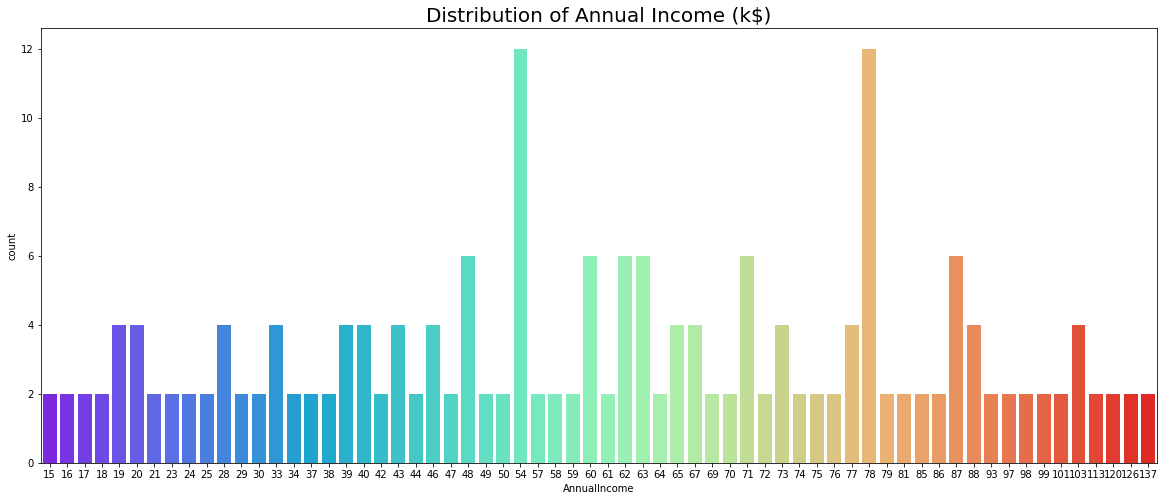

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['AnnualIncome'], palette = 'rainbow')
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.show()

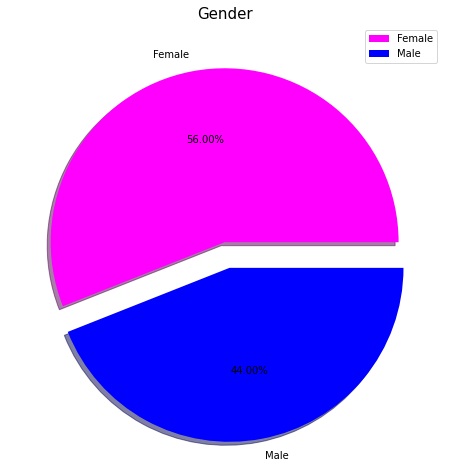

In [ ]:
plt.figure(figsize=(8,8))
size = df['Gender'].value_counts()
colors = ['magenta', 'blue']
plt.pie(size, colors = colors, explode = [0, 0.15], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

Gender Vs Annual Income

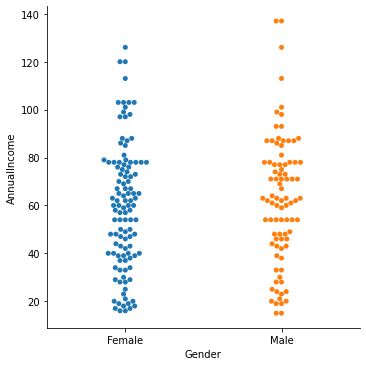

In [ ]:
# Categorical Scatterplot on Gender Vs Annual Income
sns.catplot(x="Gender", y="AnnualIncome", kind="swarm",hue="Gender", data=df.sort_values("Gender"))

Categorical attribute Gender

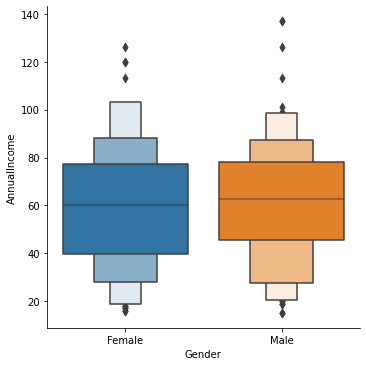

In [ ]:
# Distributions of observations within categorical attribute - "Gender"
sns.catplot(x="Gender", y="AnnualIncome", kind="boxen",data=df.sort_values("Gender"))

In the above two plots, Males get paid more than Females. But, at lower annual income level, both genders are paid equally.

Spending Score and Annual Income and gender


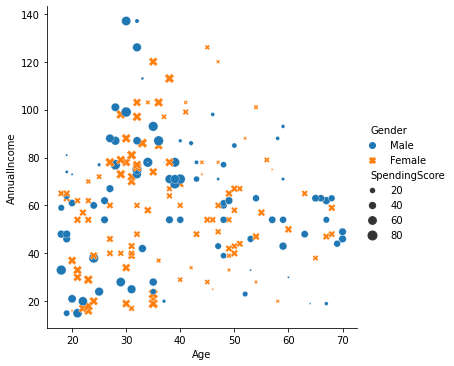

In [ ]:
sns.relplot(x="Age", y="AnnualIncome", hue="Gender", style="Gender",size="SpendingScore",sizes=(1, 100), data=df);

In the above graph, It can be seen that the Ages from 30 to 40 has higher annual income and better spending score. Males are heavy spenders then females. Sounds like this age group could be the target customers of the mall

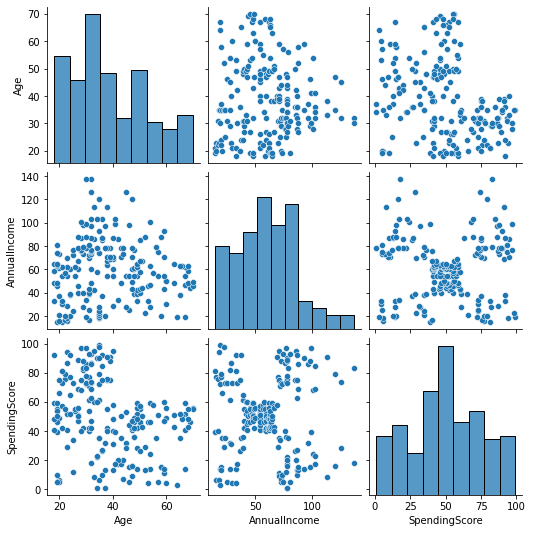

In [ ]:
# Data distribution 
sns.pairplot(df);

In the above Plots, we can infer based on the distribution pattern of Annual Income and Age that few people who earn more than 100 US Dollars.Most of the people have an earning of around 25-90 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

People with age, >20 years and < 40 years, have good spending score. Spending score and Annual Income scatter plot is providing us some insight on the clustering. Lets hold our conculsions for time being.

**Variance of each numerical attribute in the dataset**

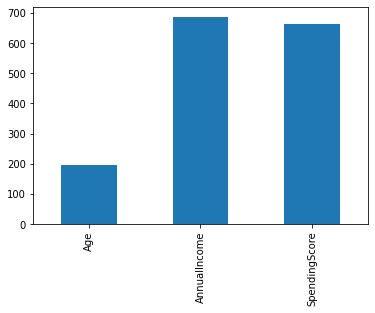

In [ ]:
# lets calculate the variance of each numerical attribute in the dataset.
df.var(ddof=0).plot(kind='bar')

**Spending Score and Annual Income**



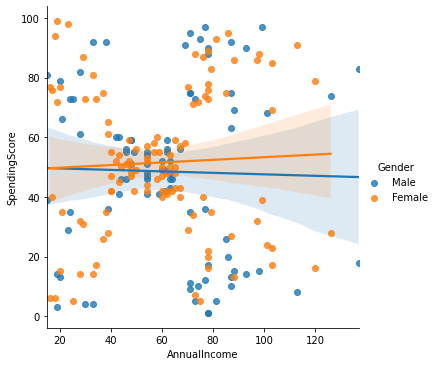

In [ ]:
sns.lmplot(x = "AnnualIncome", y = "SpendingScore", data = df, hue = "Gender")

Here we can observe how a better annual income leads to having a higher spending score, specially for women. However the correlation between these two variables isn't that big, we seem to find the majority of people in the middle, people who have decent salaries and have a reasonably high spending score.

In [ ]:
# lets calculate the SD of each numerical attribute in the dataset.
df.std(ddof=0)

Age              13.934041
AnnualIncome     26.198977
SpendingScore    25.758882
dtype: float64

Assumes the low variance features are "noise" and and high variance features are informative. In this case, Age has low variance. Again ! lets not draw any conclusions as the dataset is not normalized yet.

Data Split: Train / Test

In [ ]:
train_X, test_X = train_test_split(df, test_size=0.2, random_state=42)

print(len(train_X), "train +", len(test_X), "test")

160 train + 40 test


In [ ]:
# lets take copy of the data 
df2 = train_X.copy()

Prepare the data
The following stages are:

1. Preprocessing.LabelEncoder() - helps normalize labels such that they contain only values between 0 and n_classes-1.
2. StandardScaler - scaling to unit variance (ie Normalizing the data).
3. Principal Component analysis(PCA)- is an unsupervised statistical technique that is used for dimensionality reduction
4. Perform Clustering K means 

LabelEncoder

In [ ]:
# Let fit and transform the Gender attribute into numeric
le = LabelEncoder()
le.fit(df2.Gender)

LabelEncoder()

In [ ]:
# 0 is Female, 1 is Male
le.classes_

array(['Female', 'Male'], dtype=object)

In [ ]:
#update df2 with transformed values of gender
df2.loc[:,'Gender'] = le.transform(df2.Gender)

In [ ]:
df2.head(3)

,Gender,Age,AnnualIncome,SpendingScore
79,0,49,54,42
197,1,32,126,74
38,0,36,37,26


StandardScaler

In [ ]:
# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(df2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# transform
data_scaled = scaler.transform(df2)
data_scaled[0:3]

array([[-0.87077078,  0.73027906, -0.24190423, -0.37113766],
       [ 1.14840785, -0.50042667,  2.39455436,  0.84383985],
       [-0.87077078, -0.21084885, -0.8644014 , -0.97862642]])

The next step, PCA is sensitive to the scale of features. Hence, I have normalized the data.

**Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First step "decorrelation" and then reduces dimension.

In [ ]:
pca = PCA()

# fit PCA
pca.fit(data_scaled)

# PCA features
features = range(pca.n_components_)
features

# PCA transformed data
data_pca = pca.transform(data_scaled)
data_pca.shape

(160, 4)

In [ ]:
# PCA components variance ratios.
pca.explained_variance_ratio_

array([0.33107688, 0.26720006, 0.22991261, 0.17181045])

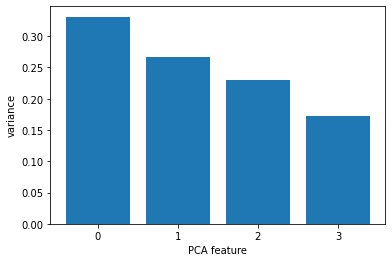

In [ ]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

This tells you that 33.2% of the dataset’s variance lies along the first axis, and 26.7% lies along the second axis. I assume, 2 Intrinsic dimensions (number of PCA features needed to approximate the dataset) is sufficient to represent dataset in flat 2-dimensional plane.

In [ ]:
# Principal component analysis (PCA) and singular value decomposition (SVD) 
# PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices.
pca2 = PCA(n_components=2, svd_solver='full')

# fit PCA
pca2.fit(data_scaled)

# PCA transformed data
data_pca2 = pca2.transform(data_scaled)
data_pca2.shape

(160, 2)

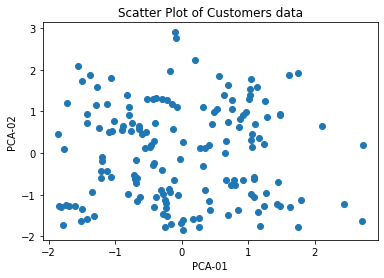

In [ ]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs)
#plt.scatter(ys, zs, c=labels)


plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()


In [ ]:
# KMeans model

# lets assume 4 clusters to start with

k=4 
kmeans = KMeans(n_clusters=k, init = 'k-means++',random_state = 42) 

# Build pipeline
pipeline = make_pipeline(scaler, pca2, kmeans)
#pipeline = make_pipeline(kmeans)
# fit the model to the scaled dataset
model_fit = pipeline.fit(df2)
model_fit

# target/labels of train_X
labels = model_fit.predict(df2)
labels

# lets add the clusters to the dataset
train_X['Clusters'] = labels
# Number of data points for each feature in each cluster
train_X.groupby('Clusters').count()

,Gender,Age,AnnualIncome,SpendingScore
Clusters,,,,
0,39,39,39,39
1,44,44,44,44
2,30,30,30,30
3,47,47,47,47


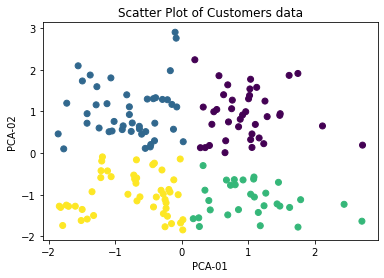

In [ ]:
# Scatter plot visuals with labels

xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

# **CLUSTERING**

# **Selecting Number of Clusters Elbow Method**

In [ ]:
#Creating values for the elbow
X = df.loc[:,["Age", "AnnualIncome", "SpendingScore"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

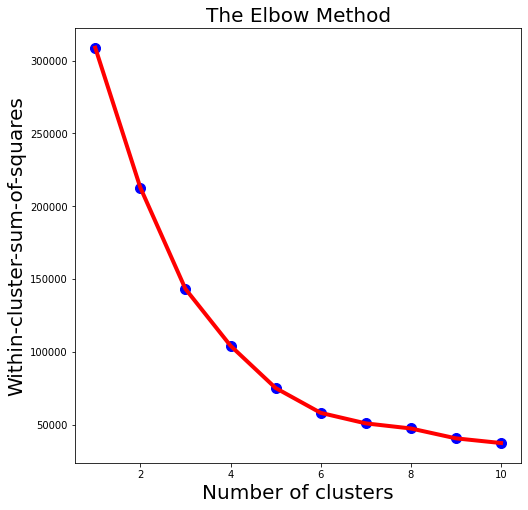

In [ ]:
# Use of the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,8))
plt.scatter(range(1, 11),wcss,c='b',s=100)
plt.plot(range(1, 11),wcss,c='r',linewidth=4)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Within-cluster-sum-of-squares',fontsize=20)
plt.show()

In [ ]:
#Plotting the elbow
#plt.plot(k , inertia , 'bo-')
#plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
#plt.show()

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k and one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. In this problem, we are using the inertia as cost function in order to identify the sum of squared distances of samples to the nearest cluster centre.

Looking at this particular example, if we imagine the line in the graphic is an arm, the elbow can be found, approximately, where the number of clusters is equal to 5. Therefore we are selecting 5 as the number of clusters to divide our data in.

In the process of clustering we will not be considering the gender factor anymore. The first main reason of why we do take this approach is because the difference between male and female in this data is not particularly high and making a gender differentiaton won't provide any further information. The second and not least important reason is the fact that stores, in general, hardly ever target a specific gender anymore, in almost every store in a shopping center male and female products can be found.

In [ ]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=4, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

As we can observe, the K-means algorithm has already finished its work and now it's time to plot the results we obtained by it so we can visualize the different clusters and analyze them.

In [ ]:
import plotly.graph_objs as go
import plotly as py


In [ ]:
#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= X['SpendingScore'],
    y= X['AnnualIncome'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'SpendingScore'),
            yaxis = dict(title  = 'AnnualIncome'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)



1. Purple Cluster - The Purple cluster groups young people with moderate to low annual income who actually spend a lot.
2. Orange Cluster -  The Orange cluster groups reasonably young people with pretty decent salaries who spend a lot.
3. Blue Cluster - The blue cluster basically groups people of all ages whose salary isn't pretty high and their spending score is moderate.
4. Yellow Cluster - The Yellow cluster groups people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.









